In [23]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
def print_matrix(sec_value):
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, sec_value)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [25]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
df_pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)

In [26]:
df_pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
Y = df_pima['label']
X = df_pima.drop(['label'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [29]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver='lbfgs', max_iter=1000)

In [30]:
cls.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = cls.predict(x_test)

In [32]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

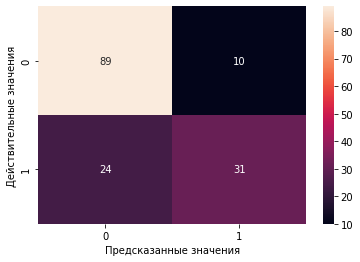

In [33]:
print_matrix(y_pred)

In [34]:
print('Метрика достоверности предсказания {}'.format(metrics.accuracy_score(y_test, y_pred)))

Метрика достоверности предсказания 0.7792207792207793


In [35]:
print('Метрика точности {}'.format(metrics.precision_score(y_test, y_pred)))

Метрика точности 0.7560975609756098


In [36]:
print('Метрика полноты {}'.format(metrics.recall_score(y_test, y_pred)))

Метрика полноты 0.5636363636363636


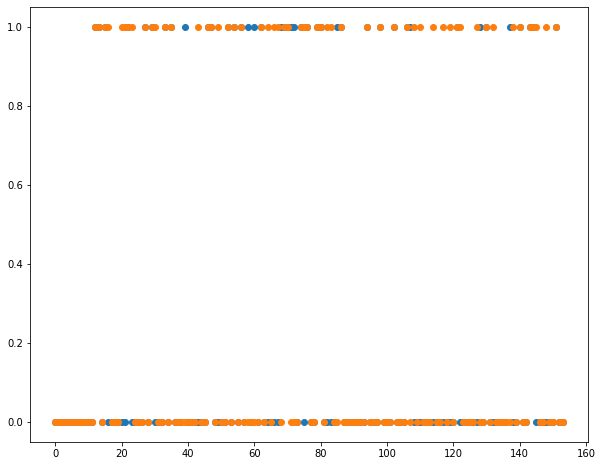

In [37]:
list_x = [i for i in range(len(y_pred))]
plt.figure(figsize=(10,8))
plt.scatter(list_x, y_pred)
plt.scatter(list_x, y_test)
plt.show()

# Метод опорных векторов

In [38]:
from sklearn import svm

clf_lin = svm.SVC(kernel='linear') # метод опорных векторов с линейным ядром 
clf_gaus = svm.SVC(kernel='rbf') # метод опорных векторов с гауссовым ядром 

clf_lin.fit(x_train, y_train)
clf_gaus.fit(x_train, y_train)

y_pred_vec_lin = clf_lin.predict(x_test)
y_pred_vec_gaus = clf_gaus.predict(x_test)

## Линейное ядро

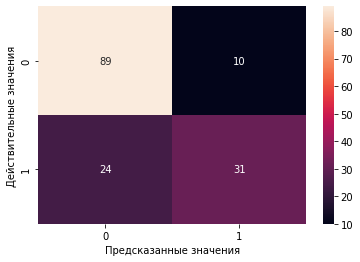

In [39]:
print_matrix(y_pred_vec_lin)

## Гауссово ядро

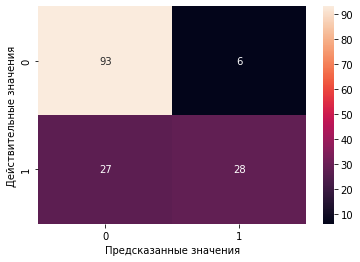

In [40]:
print_matrix(y_pred_vec_gaus)

# Метод k ближайших соседей 

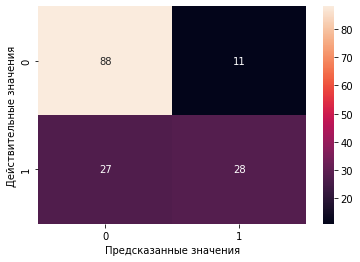

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import math

neighbors_val = int(math.sqrt(X.shape[0]))

neigh = KNeighborsClassifier(n_neighbors=neighbors_val)
neigh.fit(x_train, y_train)

y_pred_neigh = neigh.predict(x_test)
print_matrix(y_pred_neigh)

# Многослойный перцептрон

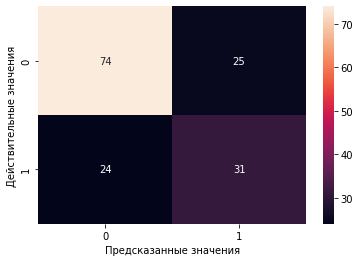

In [42]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=3000)
mlp.fit(x_train, y_train)

y_pred_mlp = mlp.predict(x_test)
print_matrix(y_pred_mlp)

# Кривые обучения

In [43]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes = np.linspace(0.1, 1, 20)

In [44]:
def print_learning_curve(model, x_train, y_train, train_sizes):
    _, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=train_sizes, cv=3)
    print(np.mean(test_scores,axis=1))
    
    plt.figure('Learning Curve')
    plt.title('Learning Curve')
    plt.xlabel('train size')
    plt.ylabel('F1 score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Learning Curve', color='red')
    plt.legend()
    plt.show()

[0.74108082 0.75897497 0.74759286 0.75243105 0.74101706 0.72961103
 0.74752909 0.74426112 0.76217121 0.75728519 0.76054519 0.7556512
 0.76056114 0.76056114 0.75891918 0.76056114 0.76055316 0.75892715
 0.76053722 0.7638052 ]


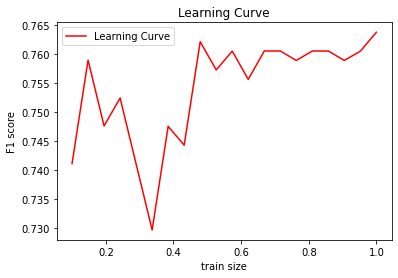

In [45]:
print_learning_curve(cls, x_train, y_train, train_sizes)

[0.7492109  0.74594293 0.74105691 0.73291089 0.72473298 0.72632712
 0.72958712 0.74914714 0.75891918 0.76053722 0.76052925 0.75402519
 0.75077315 0.75239917 0.75075721 0.76217121 0.76054519 0.76870716
 0.76382114 0.76544715]


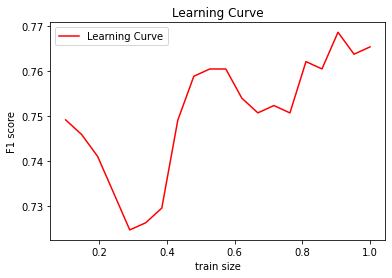

In [46]:
print_learning_curve(clf_lin, x_train, y_train, train_sizes)

[0.70035071 0.72475689 0.72145704 0.72634306 0.7393751  0.72961103
 0.72962697 0.72309103 0.72797704 0.72800893 0.71823689 0.73125299
 0.70841703 0.72146501 0.72963494 0.72636697 0.72638291 0.73125299
 0.7280169  0.73452893]


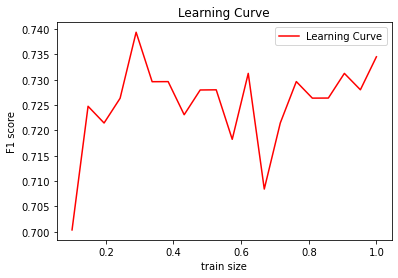

In [47]:
print_learning_curve(clf_gaus, x_train, y_train, train_sizes)

[0.65309262 0.65309262 0.71493703 0.71824486 0.70195281 0.7068468
 0.70031086 0.69868484 0.71171688 0.70519688 0.68892077 0.69216483
 0.68728678 0.69543281 0.69866093 0.69869281 0.71172485 0.72150486
 0.71171688 0.72474095]


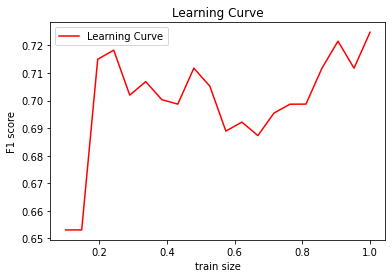

In [48]:
print_learning_curve(neigh, x_train, y_train, train_sizes)

[0.64667623 0.62873426 0.65641639 0.61569425 0.6498645  0.66290451
 0.67270046 0.6711143  0.66291248 0.64823051 0.6466045  0.67266061
 0.67913279 0.69053882 0.67101068 0.68239279 0.69218875 0.70029491
 0.71498486 0.65640842]


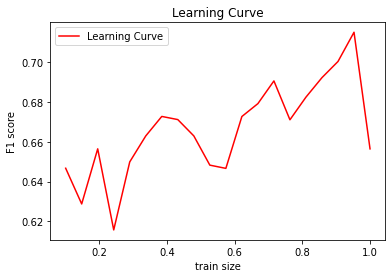

In [49]:
print_learning_curve(mlp, x_train, y_train, train_sizes)

# Анализ для другой задачи - распознавание вида ириса по параметрам растения

In [96]:
def print_matrix_iris(iris_y_test, iris_y_pred):
    class_names = [0, 1, 2]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(iris_y_test, iris_y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [97]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [98]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [99]:
iris_Y = iris_df['target']
iris_X = iris_df.drop(['target'], axis=1)

iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_Y, test_size=0.2, random_state=True)

iris_log = LogisticRegression(solver='lbfgs', max_iter=1000)
iris_log.fit(iris_x_train, iris_y_train)

iris_y_pred = iris_log.predict(iris_x_test)
metrics.confusion_matrix(iris_y_test, iris_y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

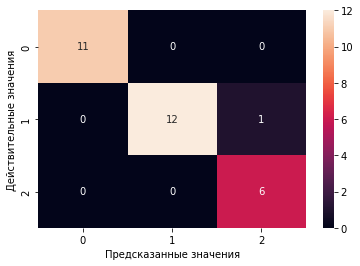

In [100]:
print_matrix_iris(iris_y_test, iris_y_pred)

In [101]:
print('Метрика достоверности предсказания {}'.format(metrics.accuracy_score(iris_y_test, iris_y_pred)))
print('Метрика точности {}'.format(metrics.precision_score(iris_y_test, iris_y_pred, average='weighted')))
print('Метрика полноты {}'.format(metrics.recall_score(iris_y_test, iris_y_pred, average='weighted')))

Метрика достоверности предсказания 0.9666666666666667
Метрика точности 0.9714285714285714
Метрика полноты 0.9666666666666667


[       nan 0.85833333 0.85       0.86666667 0.89166667 0.88333333
 0.9        0.9        0.94166667 0.95833333 0.95       0.95
 0.95833333 0.95       0.95       0.95833333 0.95833333 0.96666667
 0.975      0.96666667]


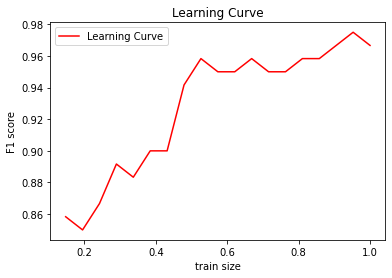

In [102]:
train_sizes = np.linspace(0.1, 1, 20)
print_learning_curve(iris_log, iris_x_train, iris_y_train, train_sizes)

# Метод опорных векторов

In [103]:
iris_clf_lin = svm.SVC(kernel='linear') # метод опорных векторов с линейным ядром 
iris_clf_gaus = svm.SVC(kernel='rbf') # метод опорных векторов с гауссовым ядром 

iris_clf_lin.fit(iris_x_train, iris_y_train)
iris_clf_gaus.fit(iris_x_train, iris_y_train)

iris_y_pred_vec_lin = iris_clf_lin.predict(iris_x_test)
iris_y_pred_vec_gaus = iris_clf_gaus.predict(iris_x_test)

[       nan 0.89166667 0.9        0.90833333 0.925      0.91666667
 0.95       0.95       0.96666667 0.95       0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.975      0.975
 0.975      0.98333333]


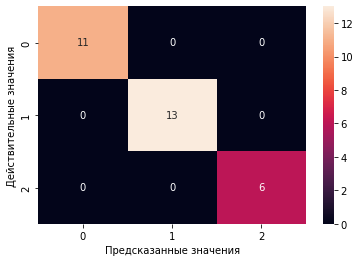

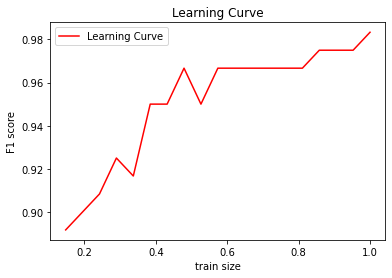

In [108]:
print_matrix_iris(iris_y_test, iris_y_pred_vec_lin)
print_learning_curve(iris_clf_lin, iris_x_train, iris_y_train, train_sizes)

[       nan 0.825      0.81666667 0.80833333 0.825      0.825
 0.86666667 0.89166667 0.91666667 0.925      0.94166667 0.93333333
 0.925      0.95       0.93333333 0.96666667 0.96666667 0.96666667
 0.975      0.975     ]


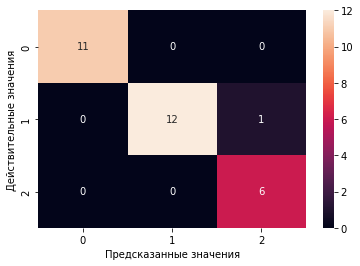

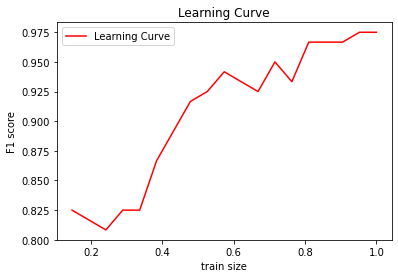

In [109]:
print_matrix_iris(iris_y_test, iris_y_pred_vec_gaus)
print_learning_curve(iris_clf_gaus, iris_x_train, iris_y_train, train_sizes)

# Метод k ближайших соседей

C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_in

[       nan        nan 0.4        0.71666667 0.775      0.81666667
 0.875      0.88333333 0.9        0.93333333 0.94166667 0.95833333
 0.95       0.95       0.95       0.96666667 0.95833333 0.95833333
 0.95833333 0.95833333]


C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_in

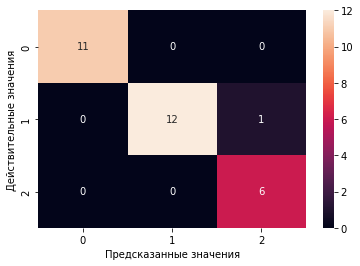

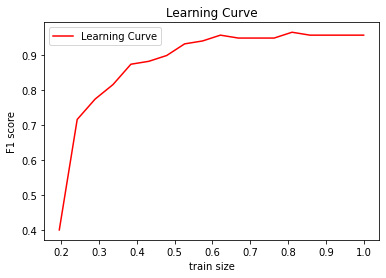

In [110]:
iris_neighbors_val = int(math.sqrt(iris_X.shape[0]))

iris_neigh = KNeighborsClassifier(n_neighbors=iris_neighbors_val)
iris_neigh.fit(iris_x_train, iris_y_train)

iris_y_pred_neigh = iris_neigh.predict(iris_x_test)

print_matrix_iris(iris_y_test, iris_y_pred_neigh)
print_learning_curve(iris_neigh, iris_x_train, iris_y_train, train_sizes)

# Многослойный перцептрон


[0.73333333 0.96666667 0.95833333 0.91666667 0.95       0.96666667
 0.95833333 0.95833333 0.95833333 0.95833333 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667]


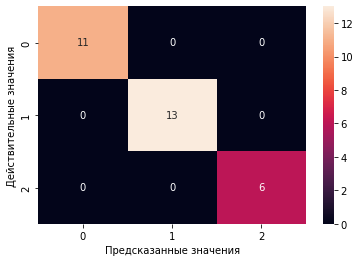

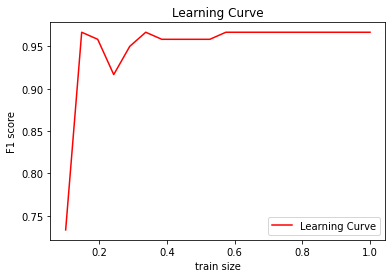

In [111]:
iris_mlp = MLPClassifier(random_state=42, max_iter=3000)
iris_mlp.fit(iris_x_train, iris_y_train)

iris_y_pred_mlp = iris_mlp.predict(iris_x_test)
print_matrix_iris(iris_y_test, iris_y_pred_mlp)
print_learning_curve(iris_mlp, iris_x_train, iris_y_train, train_sizes)

# Анализ всех метрик для всех моделей

In [73]:
print('''              Метрика достоверности предсказания |   Метрика точности   |   Метрика полноты\n
            Лог регрессия | {:^20} | {:^20} | {:^20}
  Опорный Вектор Лин ядро | {:^20} | {:^20} | {:^20}
 Опорный Вектор Гаус ядро | {:^20} | {:^20} | {:^20}
Метод k ближайших соседей | {:^20} | {:^20} | {:^20}
  Многослойный перцептрон | {:^20} | {:^20} | {:^20}
'''.format(metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred_vec_lin), metrics.precision_score(y_test, y_pred_vec_lin), metrics.recall_score(y_test, y_pred_vec_lin),
           metrics.accuracy_score(y_test, y_pred_vec_gaus), metrics.precision_score(y_test, y_pred_vec_gaus), metrics.recall_score(y_test, y_pred_vec_gaus),
           metrics.accuracy_score(y_test, y_pred_neigh), metrics.precision_score(y_test, y_pred_neigh), metrics.recall_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_mlp),metrics.precision_score(y_test, y_pred_mlp), metrics.recall_score(y_test, y_pred_mlp)))

              Метрика достоверности предсказания |   Метрика точности   |   Метрика полноты

            Лог регрессия |  0.7792207792207793  |  0.7560975609756098  |  0.5636363636363636 
  Опорный Вектор Лин ядро |  0.7792207792207793  |  0.7560975609756098  |  0.5636363636363636 
 Опорный Вектор Гаус ядро |  0.7857142857142857  |  0.8235294117647058  |  0.509090909090909  
Метод k ближайших соседей |  0.7532467532467533  |  0.717948717948718   |  0.509090909090909  
  Многослойный перцептрон |  0.6818181818181818  |  0.5535714285714286  |  0.5636363636363636 



# Контрольные вопросы



1.	Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?

2.	Чем логистическая регрессия отличается от линейной?

3.	С помощью каких методов происходит оптимизация параметров логистической регрессии?


4.	Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?


5.	Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?


6.	Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?


7.	В чем особенности метода ближайших соседей?